In [1]:
import json
import sys
import os

sys.path.append("../../")

from didgelab.calc.geo import Geo, geotools

import didgelab.calc.fft
from didgelab.calc.sim.sim import *
from didgelab.calc.fft import *
from didgelab.calc.conv import *
from didgelab.util.didge_visualizer import vis_didge


  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      -4.47      -31   75.89      24.78     1.00
1        D2      20.53      -19  153.99       8.94     0.36
2        B3      35.53      -10  261.23       0.81     0.03
3        E3       5.53       -5  342.71       5.18     0.21
4        A4       5.53        0  457.46       1.02     0.04
5        C4      45.53        3  556.73       5.18     0.21
6        F4      -9.47        8  719.91       2.93     0.12
7        G4       0.53       10  812.75       0.58     0.02
8        A5      40.53       12  933.60       3.03     0.12
Impedance sum: 52.47
Volume: 85.42 cm3
Length: 165.78 cm
Bell diameter: 10.16 cm


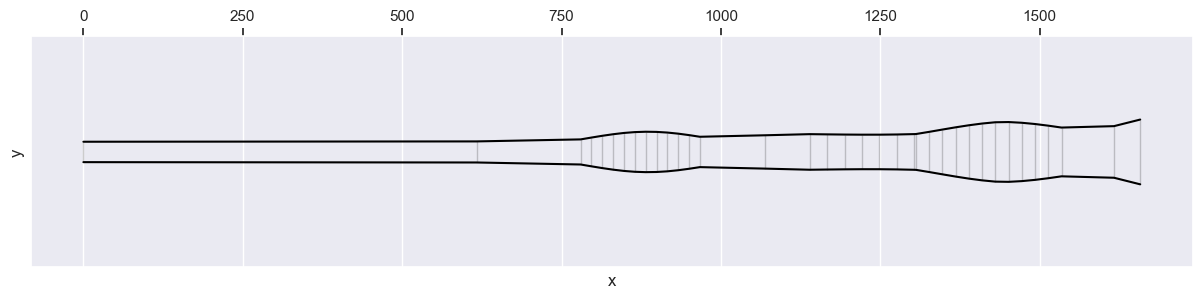

In [37]:
def get_latest_population(indir):
    files = filter(lambda x:x[0:10] == "population", os.listdir(indir))
    files = [x[10:x.find(".")] for x in files]
    files = filter(lambda x:x.isnumeric(), files)
    files = sorted([int(x) for x in files])
    file = f"population{files[-1]}.json"
    return json.load(open(os.path.join(indir, file)))

def eval_individual(individual, base_freq=440):
    geo = individual["representation"]["geo"]
    geo = Geo(geo)
    vis_didge(geo)
    results = quick_analysis(geo, base_freq=base_freq)
    print(results["notes"].round(2))
    print(f"Impedance sum: {results['notes'].impedance.sum():.2f}")
    print(f"Volume: {geo.compute_volume()/1000:.2f} cm3")
    print(f"Length: {geo.geo[-1][0]/10:.2f} cm")
    print(f"Bell diameter: {geo.geo[-1][1]/10:.2f} cm")
    return results, geo

indir = "../../../saved_evolutions/2024-04-12T13-13-38_evolve_arusha"
population = get_latest_population(indir)
_ = eval_individual(population[0], base_freq=456)


************************
Individual 0
************************


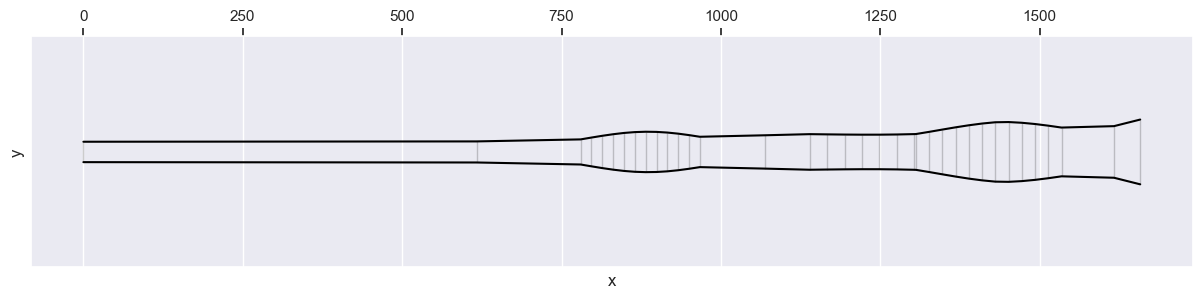

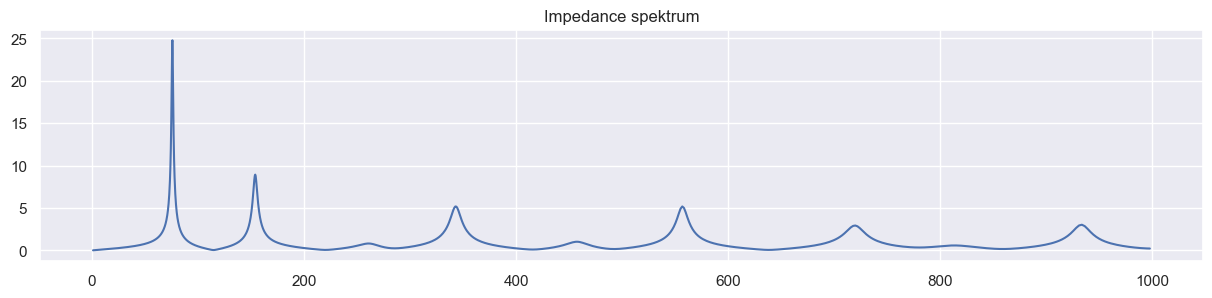

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      -4.47      -31   75.89      24.78     1.00
1        D2      20.53      -19  153.99       8.94     0.36
2        B3      35.53      -10  261.23       0.81     0.03
3        E3       5.53       -5  342.71       5.18     0.21
4        A4       5.53        0  457.46       1.02     0.04
5        C4      45.53        3  556.73       5.18     0.21
6        F4      -9.47        8  719.91       2.93     0.12
7        G4       0.53       10  812.75       0.58     0.02
8        A5      40.53       12  933.60       3.03     0.12
Impedance sum: 52.47
Volume: 85.42 cm3
Length: 165.78 cm
Bell diameter: 10.16 cm

************************
Individual 1
************************


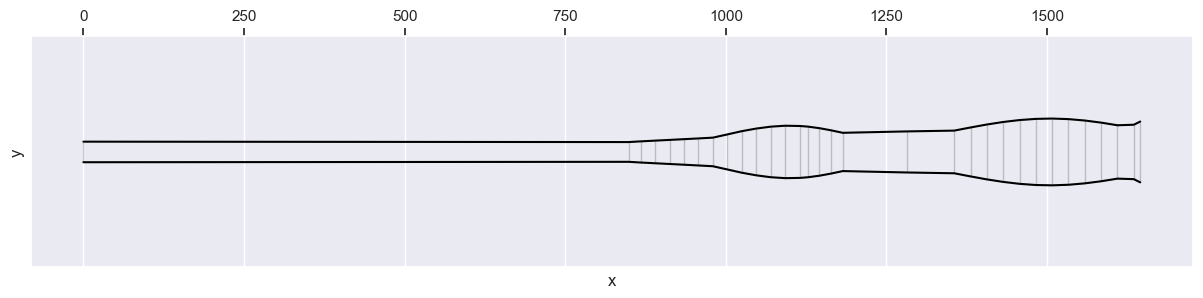

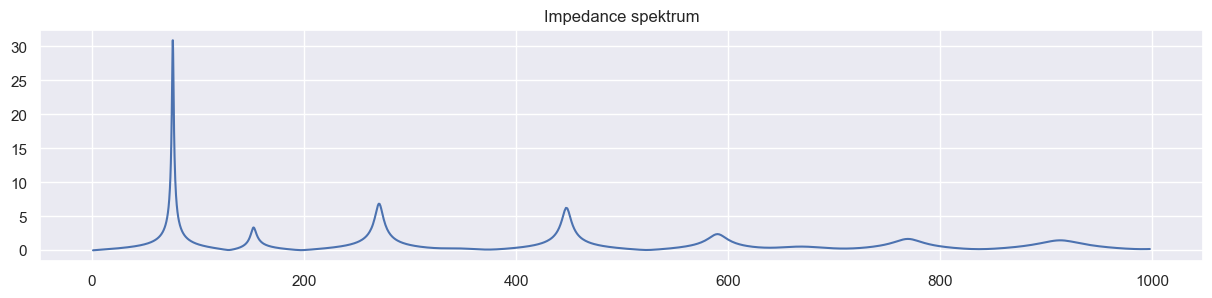

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      30.90     1.00
1        D2       0.53      -19  152.22       3.36     0.11
2        C3      -4.47       -9  270.44       6.86     0.22
3        E3     -14.47       -5  338.77       0.30     0.01
4        A4     -34.47        0  447.01       6.25     0.20
5       C#4      45.53        4  589.83       2.40     0.08
6        E4     -39.47        7  667.83       0.56     0.02
7       F#4       5.53        9  769.35       1.69     0.05
8        A5       0.53       12  912.28       1.48     0.05
Impedance sum: 53.80
Volume: 83.72 cm3
Length: 164.50 cm
Bell diameter: 9.46 cm

************************
Individual 2
************************


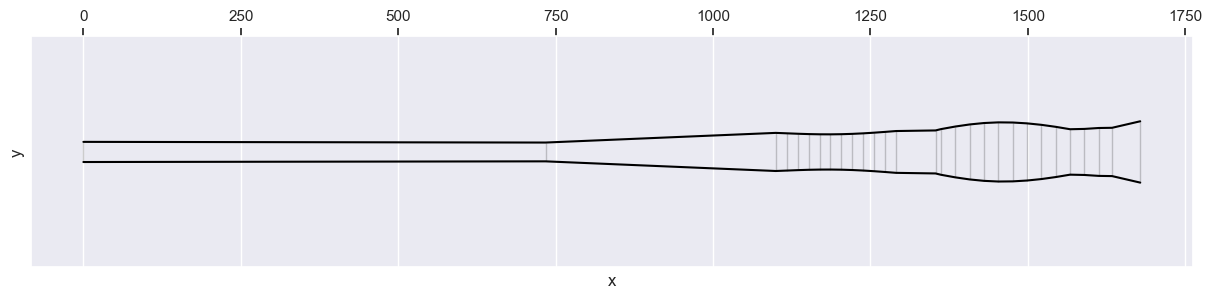

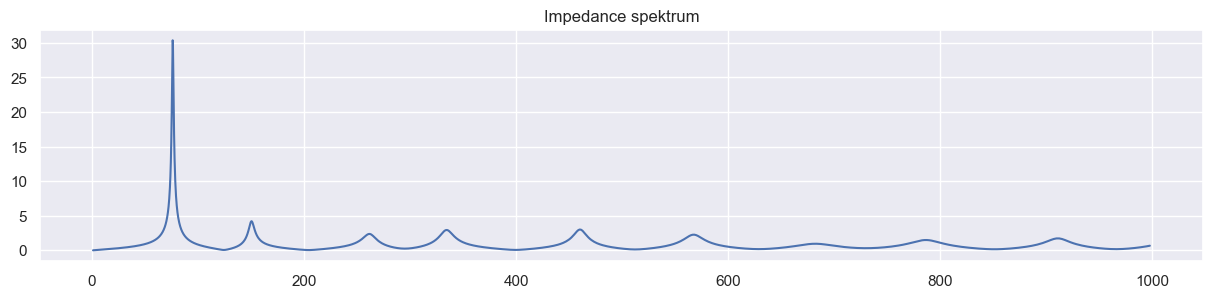

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      30.36     1.00
1        D2     -19.47      -19  150.47       4.22     0.14
2        B3      40.53      -10  261.98       2.38     0.08
3        E3     -34.47       -5  334.88       2.95     0.10
4        A4      15.53        0  460.11       3.02     0.10
5       C#4     -19.47        4  568.10       2.27     0.07
6        E4      -4.47        7  681.47       0.96     0.03
7       F#4      45.53        9  787.33       1.50     0.05
8        A5       0.53       12  912.28       1.73     0.06
Impedance sum: 49.38
Volume: 87.30 cm3
Length: 167.85 cm
Bell diameter: 9.74 cm



In [52]:
import matplotlib.pyplot as plt
base_freq=456
for i in range(3):
    geo = population[i]["representation"]["geo"]
    geo = Geo(geo)
    freqs = get_log_simulation_frequencies(1, 1000, 5)
    segments = create_segments(geo)
    impedance = compute_impedance(segments, freqs)
    notes = get_notes(freqs, impedance, base_freq=base_freq)
    print("************************")
    print(f"Individual {i}")
    print("************************")
    vis_didge(geo)
    plt.show()
    plt.plot(freqs, impedance)
    plt.title("Impedance spektrum")
    plt.show()
    print(notes.round(2))
    print(f"Impedance sum: {notes.impedance.sum():.2f}")
    print(f"Volume: {geo.compute_volume()/1000:.2f} cm3")
    print(f"Length: {geo.geo[-1][0]/10:.2f} cm")
    print(f"Bell diameter: {geo.geo[-1][1]/10:.2f} cm")
    print()


  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      30.90     1.00
1        D2       0.53      -19  152.22       3.36     0.11
2        C3      -4.47       -9  270.44       6.86     0.22
3        E3     -14.47       -5  338.77       0.30     0.01
4        A4     -34.47        0  447.01       6.25     0.20
5       C#4      45.53        4  589.83       2.40     0.08
6        E4     -39.47        7  667.83       0.56     0.02
7       F#4       5.53        9  769.35       1.69     0.05
8        A5       0.53       12  912.28       1.48     0.05
Impedance sum: 53.80
Volume: 83.72 cm3
Length: 164.50 cm
Bell diameter: 9.46 cm


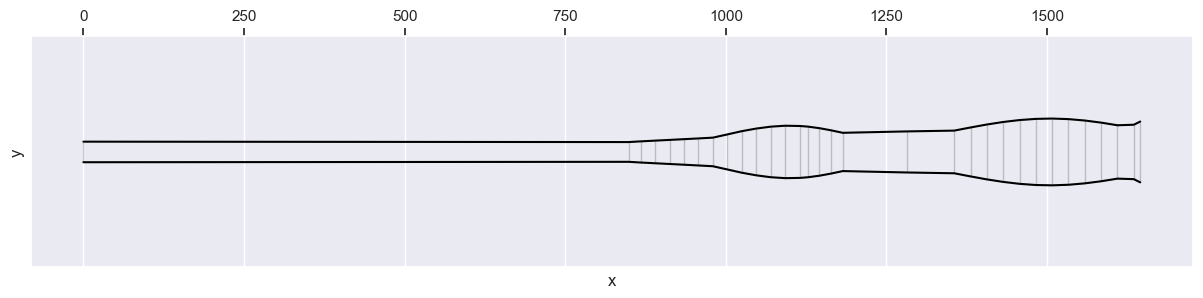

In [38]:
results, geo = eval_individual(population[1], base_freq=456)

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      30.36     1.00
1        D2     -19.47      -19  150.47       4.22     0.14
2        B3      40.53      -10  261.98       2.38     0.08
3        E3     -34.47       -5  334.88       2.95     0.10
4        A4      15.53        0  460.11       3.02     0.10
5       C#4     -19.47        4  568.10       2.27     0.07
6        E4      -4.47        7  681.47       0.96     0.03
7       F#4      45.53        9  787.33       1.50     0.05
8        A5       0.53       12  912.28       1.73     0.06
Impedance sum: 49.38
Volume: 87.30 cm3
Length: 167.85 cm
Bell diameter: 9.74 cm


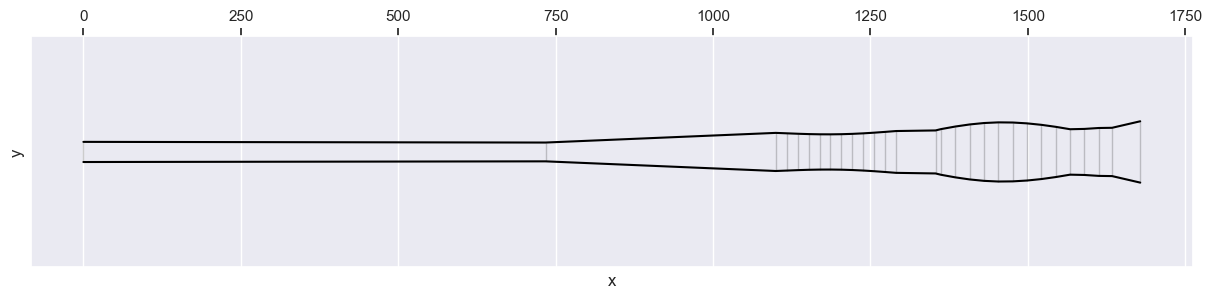

In [34]:
results = eval_individual(population[2], base_freq=456)


  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      15.53      -31   76.77      26.44     1.00
1        D2      -9.47      -19  151.34       5.22     0.20
2        C3      10.53       -9  272.79       3.92     0.15
3        E3       0.53       -5  341.72       1.02     0.04
4        A4      15.53        0  460.11       5.72     0.22
5        D4      -9.47        5  605.37       4.05     0.15
6        F4      35.53        8  738.86       1.09     0.04
7        G4      20.53       10  822.19       1.29     0.05
8       A#5     -29.47       13  949.92       2.28     0.09
Impedance sum: 51.02
Volume: 84.75 cm3
Length: 164.01 cm
Bell diameter: 10.46 cm


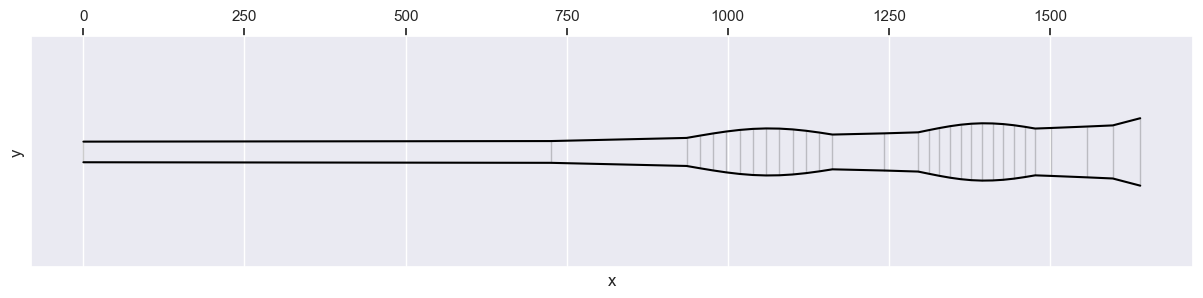

In [40]:
_ = eval_individual(population[3], base_freq=456)

In [39]:
notes = results["notes"].copy()
notes = notes[['note_name', 'cent_diff', 'note_nr', 'freq']]

harmonic_series = np.array([notes.freq.iloc[0]*i for i in range(1, 50)])
notes["harmonic"] = [harmonic_series[np.argmin(np.abs(freq-harmonic_series))] for freq in notes.freq]
notes["delta"] = notes.freq - notes.harmonic
notes

,note_name,cent_diff,note_nr,freq,harmonic,delta
0,D1,0.531983,-31,76.109255,76.109255,0.000000
1,D2,0.531983,-19,152.218511,152.218511,0.000000
2,C3,-4.468017,-9,270.440361,304.437021,-33.996661
3,E3,-14.468017,-5,338.771023,304.437021,34.334001
4,A4,-34.468017,0,447.011044,456.655532,-9.644488
5,C#4,45.531983,4,589.834609,608.874043,-19.039434
6,E4,-39.468017,7,667.828260,684.983298,-17.155039
7,F#4,5.531983,9,769.351993,761.092554,8.259440
8,A5,0.531983,12,912.280287,913.311064,-1.030777


  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1      -4.47      -31   75.89      24.78     1.00
1        D2      20.53      -19  153.99       8.94     0.36
2        B3      35.53      -10  261.23       0.81     0.03
3        E3       5.53       -5  342.71       5.18     0.21
4        A4       5.53        0  457.46       1.02     0.04
5        C4      45.53        3  556.73       5.18     0.21
6        F4      -9.47        8  719.91       2.93     0.12
7        G4       0.53       10  812.75       0.58     0.02
8        A5      40.53       12  933.60       3.03     0.12
Impedance sum: 52.47
Volume: 85.42 cm3
Length: 165.78 cm
Bell diameter: 10.16 cm


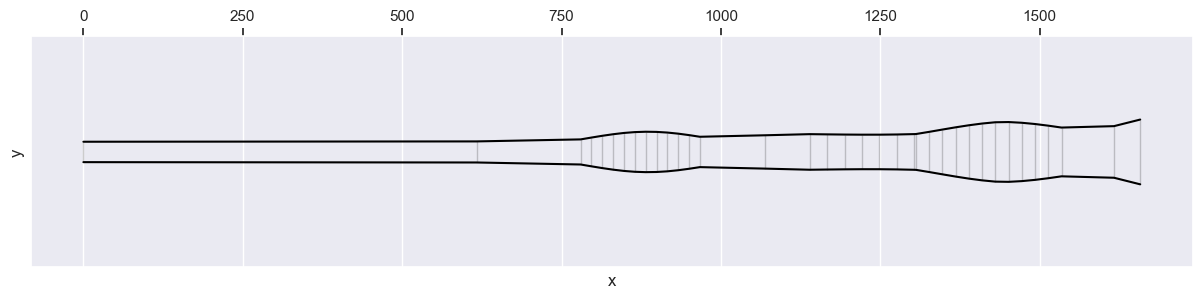

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      30.90     1.00
1        D2       0.53      -19  152.22       3.36     0.11
2        C3      -4.47       -9  270.44       6.86     0.22
3        E3     -14.47       -5  338.77       0.30     0.01
4        A4     -34.47        0  447.01       6.25     0.20
5       C#4      45.53        4  589.83       2.40     0.08
6        E4     -39.47        7  667.83       0.56     0.02
7       F#4       5.53        9  769.35       1.69     0.05
8        A5       0.53       12  912.28       1.48     0.05
Impedance sum: 53.80
Volume: 83.72 cm3
Length: 164.50 cm
Bell diameter: 9.46 cm


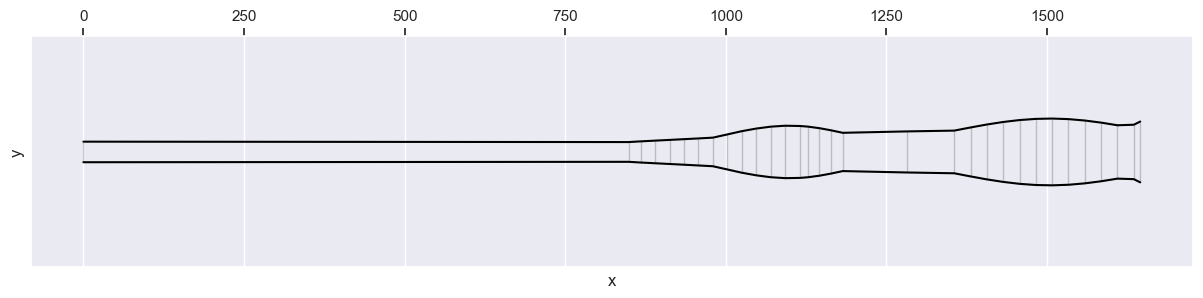

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        D1       0.53      -31   76.11      30.36     1.00
1        D2     -19.47      -19  150.47       4.22     0.14
2        B3      40.53      -10  261.98       2.38     0.08
3        E3     -34.47       -5  334.88       2.95     0.10
4        A4      15.53        0  460.11       3.02     0.10
5       C#4     -19.47        4  568.10       2.27     0.07
6        E4      -4.47        7  681.47       0.96     0.03
7       F#4      45.53        9  787.33       1.50     0.05
8        A5       0.53       12  912.28       1.73     0.06
Impedance sum: 49.38
Volume: 87.30 cm3
Length: 167.85 cm
Bell diameter: 9.74 cm


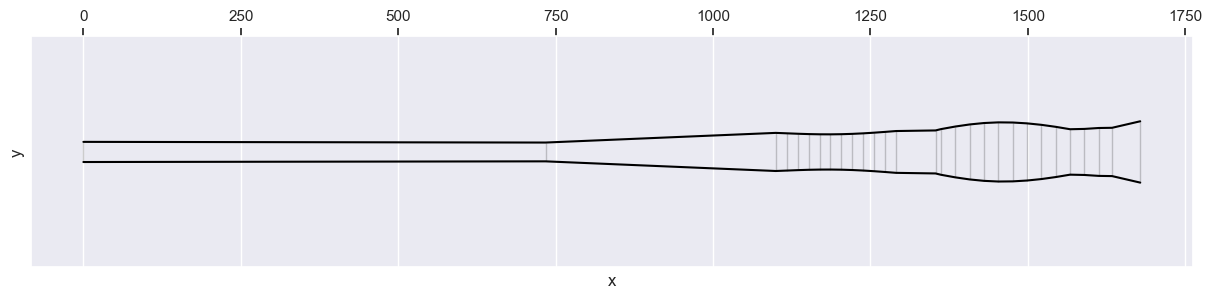

In [44]:
import matplotlib.pyplot as plt
for i in range(3):
    _ = eval_individual(population[i], base_freq=456)
    plt.show()
